### Dataset:   [link of the dataset](https://drive.google.com/file/d/1qah8AXuABM8PwAYNwgm6zUqxX70JOp3L/view?usp=sharing)

In [111]:
# Importing the libraries and loading the .csv file in a dataframe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [112]:
# loading the dataset
dataset = pd.read_csv('CFS_dataset.csv')

In [113]:
# head of the data set
dataset.head(5)

,initially failed lines,failed lines after cascade,Cmax,Cmin,loadshedding constraint,loading ratio,capacity estimation error,flow capacity,Island?,degree,distance,installed cap,Load shedd,Load shedd.1,demand,served,HEP,generated,Alpha,failed lines due to cascade
0,6,86,200,50,0.45,0.90,0.50,768,0,2.675,7.397,1550,6307,6307,8970.0,2663.0,0.50,2663.0,0.2,80
1,4,52,200,100,0.05,0.85,0.20,209,0,2.699,6.912,450,2934,2934,8471.0,5537.0,0.50,5538.0,0.2,48
2,7,17,200,100,0.40,0.75,0.01,537,0,2.663,6.951,1050,700,700,7475.0,6775.0,0.50,6774.0,0.2,10
3,9,9,200,50,0.30,0.90,0.05,526,0,2.638,7.048,850,1507,1507,8970.0,7463.0,0.29,7462.0,0.2,0
4,3,82,200,50,0.05,0.85,0.35,149,0,2.712,6.855,300,3534,3534,8471.0,4937.0,0.72,4937.0,0.2,79


In [114]:
# Tail of the dataset to check the size is okay
dataset.tail(2)

,initially failed lines,failed lines after cascade,Cmax,Cmin,loadshedding constraint,loading ratio,capacity estimation error,flow capacity,Island?,degree,distance,installed cap,Load shedd,Load shedd.1,demand,served,HEP,generated,Alpha,failed lines due to cascade
66815,10,56,100,50,0.70,0.7,0.15,481,0,2.625767,6.960539,900,2380,2380,6976.34,4596.34,0.091743,4595.900659,0.10,46
66816,5,47,200,100,0.55,0.6,0.20,499,0,2.687117,6.827160,800,1574,1574,5979.72,4405.72,0.168067,4405.717426,0.01,42


- Loadshed is available twice in the dataset. So, I will drop that column.

In [115]:
#columns of the dataset
dataset.columns

Index(['initially failed lines', 'failed lines after cascade', 'Cmax', 'Cmin',
       'loadshedding constraint', 'loading ratio', 'capacity estimation error',
       'flow capacity', 'Island?', 'degree', 'distance', 'installed cap',
       'Load shedd', 'Load shedd.1', 'demand', 'served', 'HEP', 'generated',
       'Alpha', 'failed lines due to cascade'],
      dtype='object')

- The dataset column names are not consistent. So, I need to rename them to avoid inconsistency

In [116]:
dataset.rename(columns={'initially failed lines': 'Intial_failed_lines', 
                       'failed lines after cascade':'Failed_lines_after_cascade_ends',
                        'loadshedding constraint': 'Load_shedding_constraint',
                        'loading ratio': 'Load_generation_ratio',
                        'capacity estimation error':'Capacity_estimation_error',
                        'flow capacity':'Flow_capacity','degree':'Degree', 'distance':'Distance',
                        'installed cap':'Installed_capacity',
        'demand':'Demand', 'served':'Served', 'HEP':'Human_error_Probability', 'generated':'Generation',
        'failed lines due to cascade':'Failed_lines_due_to_cascade'
                       },inplace=True)

In [117]:
# shape of the dataset
dataset.shape

(66817, 20)

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66817 entries, 0 to 66816
Data columns (total 20 columns):
Intial_failed_lines                66817 non-null int64
Failed_lines_after_cascade_ends    66817 non-null int64
Cmax                               66817 non-null int64
Cmin                               66817 non-null int64
Load_shedding_constraint           66817 non-null float64
Load_generation_ratio              66817 non-null float64
Capacity_estimation_error          66817 non-null float64
Flow_capacity                      66817 non-null int64
Island?                            66817 non-null int64
Degree                             66817 non-null float64
Distance                           66817 non-null float64
Installed_capacity                 66817 non-null int64
Load shedd                         66817 non-null int64
Load shedd.1                       66817 non-null int64
Demand                             66817 non-null float64
Served                             6681

Since the dataset was generated from simulation, there should be no missing values in the dataset. We can confirm from above that there are no missing values in the dataset.

### Data cleaing and wranling 

- Load shedd and Load shedd.1 are same so remove Load shedd.1 

In [119]:
dataset.drop('Load shedd.1',axis=1,inplace=True)

In [120]:
# renaming Load shedd
dataset.rename(columns={'Load shedd':'Loadshed'},inplace=True)
dataset.head(2)

,Intial_failed_lines,Failed_lines_after_cascade_ends,Cmax,Cmin,Load_shedding_constraint,Load_generation_ratio,Capacity_estimation_error,Flow_capacity,Island?,Degree,Distance,Installed_capacity,Loadshed,Demand,Served,Human_error_Probability,Generation,Alpha,Failed_lines_due_to_cascade
0,6,86,200,50,0.45,0.90,0.5,768,0,2.675,7.397,1550,6307,8970.0,2663.0,0.5,2663.0,0.2,80
1,4,52,200,100,0.05,0.85,0.2,209,0,2.699,6.912,450,2934,8471.0,5537.0,0.5,5538.0,0.2,48


Now, I will check the summary statistic and the correlation between variables to check if there is any inconsistency.

In [121]:
dataset_describe = dataset.describe().transpose()

In [122]:
dataset_describe = dataset_describe.drop('count',axis =1)

In [123]:
# round the statistics to 2 decimal points
round (dataset_describe,2)

,mean,std,min,25%,50%,75%,max
Intial_failed_lines,6.00,2.58,2.00,4.00,6.00,8.00,10.00
Failed_lines_after_cascade_ends,42.84,22.54,2.00,27.00,49.00,58.00,104.00
Cmax,197.47,171.80,50.00,100.00,200.00,200.00,800.00
Cmin,65.22,34.97,50.00,50.00,50.00,50.00,800.00
Load_shedding_constraint,0.32,0.24,0.01,0.15,0.30,0.50,0.90
Load_generation_ratio,0.73,0.15,0.50,0.60,0.75,0.85,0.99
Capacity_estimation_error,0.22,0.15,0.01,0.10,0.20,0.35,0.50
Flow_capacity,428.19,257.28,0.00,224.00,391.00,587.00,1895.00
Island?,0.01,0.08,0.00,0.00,0.00,0.00,1.00
Degree,2.67,0.03,2.63,2.65,2.67,2.70,2.74


Now, we need to check whether all the columns of the dataset are relevant. To do that, we can check the correlation and heatmap of correlation using seaborn visualization.


In [124]:
correlation = round(dataset.corr(),2)

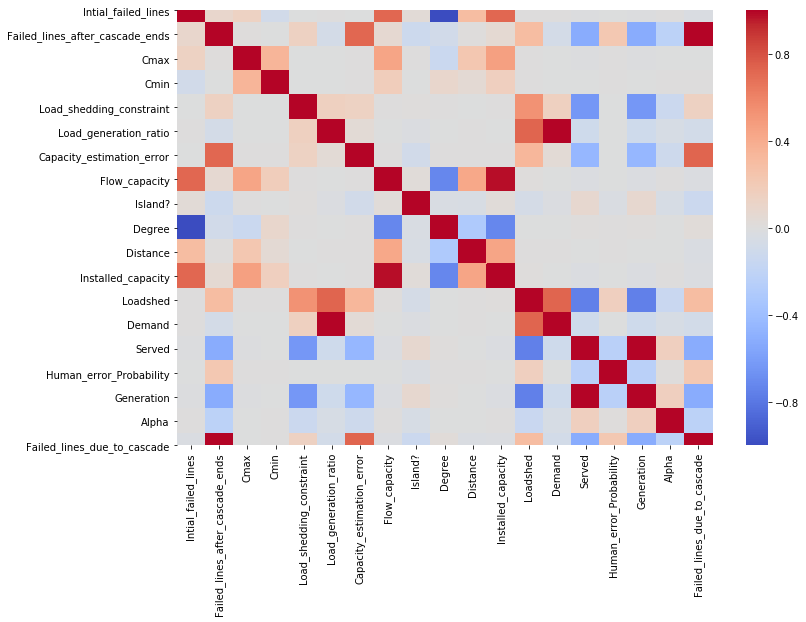

In [125]:
plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr(),cmap ='coolwarm',)
plt.savefig('heatmap.png', format='png',bbox_inches='tight')

In the dataset, we can do the following column removals:

- Loadshed is calculated as the difference between demand and served loads. We need to remove demand and served columns to avoid colinearity. 
- Island columns can be removed as the value_counts are mostly zero and do not correlate with the failed lines due to cascade.  
- We want to predict failed lines due to cascade. So, we should remove failed lines after cascade ends to avoid colinearity.
- Flow capacity through the lines needs to be removed as we want to predict the cascade from installed capacities.

In [126]:
dataset['Island?'].value_counts()

0    66388
1      429
Name: Island?, dtype: int64

Text(0, 0.5, 'Count')

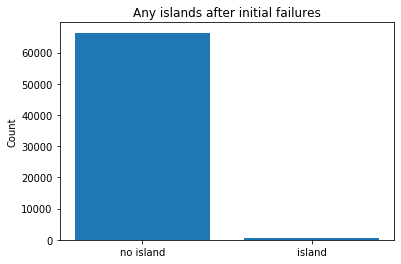

In [127]:
plt.bar(['no island','island'],[66388,429])
plt.title('Any islands after initial failures')
plt.ylabel('Count')

In [128]:
dataset.drop(['Island?','Served','Demand','Failed_lines_after_cascade_ends','Flow_capacity'],axis=1,inplace=True)

- Here, our objective is to predict cascading failures. In the dataset, the output variables are Loadshed and Failed lines due to cascade. We define a normalized cascading effect variable as a linear combination of Loadshed and Failed lines due to cascade. 

In [129]:
scaler = MinMaxScaler()
Scaled_data = scaler.fit_transform(dataset[['Loadshed','Failed_lines_due_to_cascade']])

- After normalizing the data, we use a linear combination of  Loadshed and Failed lines due to cascade to calculate the cascading effect and then insert that into the dataframe.

In [130]:
scaled_df = pd.DataFrame(Scaled_data)
scaled_df['Cascading effect'] = 0.5*scaled_df[0]+0.5*scaled_df[1]
dataset =pd.concat((dataset,scaled_df['Cascading effect']),axis =1)

In [131]:
#Check the head of the dataset again
dataset.head()

,Intial_failed_lines,Cmax,Cmin,Load_shedding_constraint,Load_generation_ratio,Capacity_estimation_error,Degree,Distance,Installed_capacity,Loadshed,Human_error_Probability,Generation,Alpha,Failed_lines_due_to_cascade,Cascading effect
0,6,200,50,0.45,0.90,0.50,2.675,7.397,1550,6307,0.50,2663.0,0.2,80,0.736267
1,4,200,100,0.05,0.85,0.20,2.699,6.912,450,2934,0.50,5538.0,0.2,48,0.398677
2,7,200,100,0.40,0.75,0.01,2.663,6.951,1050,700,0.50,6774.0,0.2,10,0.087555
3,9,200,50,0.30,0.90,0.05,2.638,7.048,850,1507,0.29,7462.0,0.2,0,0.076366
4,3,200,50,0.05,0.85,0.35,2.712,6.855,300,3534,0.72,4937.0,0.2,79,0.590540


### Data Visualization and storytelling

*  In this section, I would use various visualization techniques to identify the important features for cascading failures. We can already get an excellent estimate by looking at the heatmap. For example, Loadshed and Failed lines due to cascade would have a high correlation with Cascading_effect as it was calculated as a linear combination of them. In the heatmap, both slots, (Loadshed, Cascading_effect) and (failed lines due to cascade, Cascading_effect) are marked with red color indicating a high positive correlation

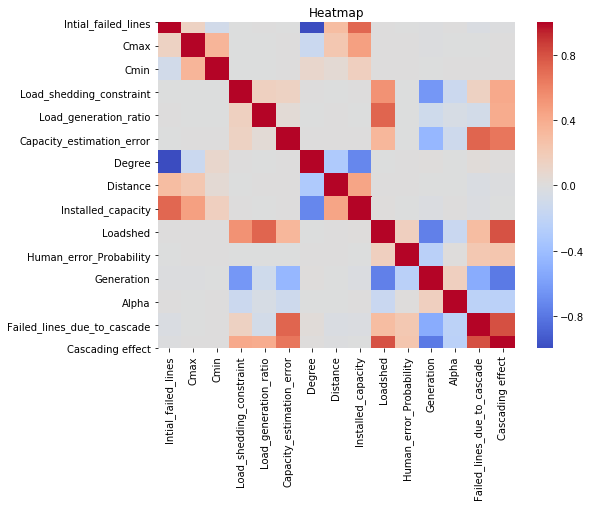

In [132]:
plt.subplots(figsize=(8,6))
sns.heatmap(dataset.corr(),cmap ='coolwarm',)
plt.title('Heatmap')
plt.savefig('heatmap.png', format='png',bbox_inches='tight')

The figure above represents the updated heatmap plot after removing unwanted columns.

In [133]:
dataset.rename(columns ={'Cascading effect':'Cascading_effect'},inplace = True)

- First, let's look at the histograms of the dataset. 

- Checking the histogram of the cascading effect. It can be observed that the histogram looks bimodal. The first pick indicates a zone where no additional transmission liens were failed due to cascade, and no loads were shed, i.e., for the set of feature values, no cascading occurred. Similarly, the second pick represents that average cascading effect occurred at 0.35

- The histogram of load-shedding is slightly skewed to the left, which is intuitive. This indicates the probability of a large cascading failure occurring is less. This also indicates that matpower optimal power flow (OPF)  is curtailing the loads efficiently to minimize the greater risk of a cascading failure. 

- The histogram of failed transmission lines due to cascade also validates the statement above. Looking at the histogram, we can see there are around 13500 points with zero additional failures, which is roughly around 20% of the samples. In those 20% samples, only zero/small load-shedding was performed but no additional line failures.  Note that in the data collection process, we kept the optimization constraint parameters for load-shedding as constant. for details on matpower power flow algorithms, please read the [matpower manual](https://matpower.org/docs/manual.pdf)

- Finally, the bottom right histogram shows the frequency distribution of the human error probability used in the simulation. The human error probability was calculated based on operators' performance attributes and the distribution of the operators' performance attributes, see this [paper](https://ieeexplore.ieee.org/abstract/document/8905687/). The distribution of human operator errors was calculated from operator interviews using the SPAR-H methodology in prior research work. [[3]](https://journals.sagepub.com/doi/abs/10.1177/1541931215591144). 

Text(0.5, 1.0, 'Distribution of human error probability of the samples')

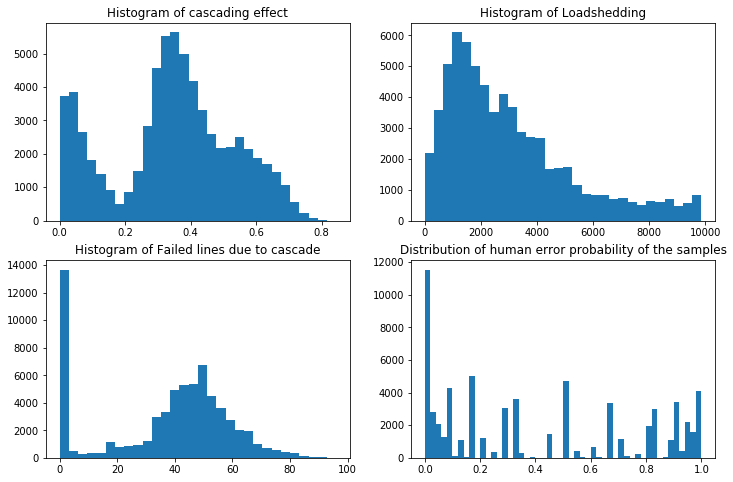

In [134]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(dataset.Cascading_effect, bins =30)
plt.title('Histogram of cascading effect')
plt.subplot(2,2,2)
plt.hist(dataset.Loadshed,bins =30,cumulative=False,histtype='bar')
plt.title('Histogram of Loadshedding')
plt.subplot(2,2,3)
plt.hist(dataset.Failed_lines_due_to_cascade,bins =30)
plt.title('Histogram of Failed lines due to cascade')
plt.subplot(2,2,4)
dataset.Human_error_Probability.hist(bins = 50, grid = False)
plt.title('Distribution of human error probability of the samples')

- In the simulation, we first calculated the human error probability as described above, and then based on of the status power grid (represented by the load-generation ratio, load shedding constrain and capacity estimation error) we modified it using a small set of rules and then embedded it in the simulation to capture the effect of human errors on cascading failure


Now let's look at some boxplots to see the joint relations between some variables.

In [135]:
dataset.columns

Index(['Intial_failed_lines', 'Cmax', 'Cmin', 'Load_shedding_constraint',
       'Load_generation_ratio', 'Capacity_estimation_error', 'Degree',
       'Distance', 'Installed_capacity', 'Loadshed', 'Human_error_Probability',
       'Generation', 'Alpha', 'Failed_lines_due_to_cascade',
       'Cascading_effect'],
      dtype='object')

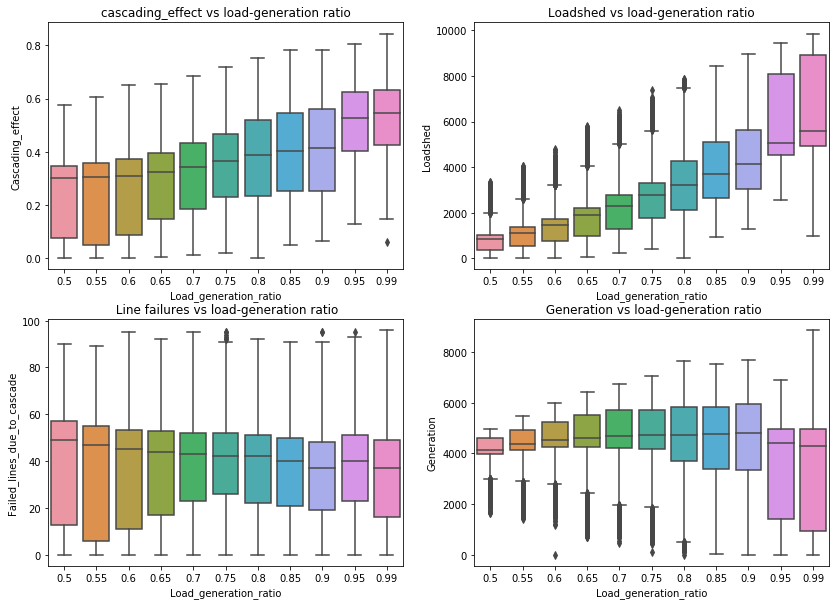

In [136]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.title('cascading_effect vs load-generation ratio')
sns.boxplot(y = 'Cascading_effect', x ='Load_generation_ratio', data=dataset)

plt.subplot(2,2,2)
plt.title('Loadshed vs load-generation ratio')
sns.boxplot(y = 'Loadshed', x ='Load_generation_ratio', data=dataset)
plt.subplot(2,2,3)
plt.title(' Line failures vs load-generation ratio')
sns.boxplot(y = 'Failed_lines_due_to_cascade', x ='Load_generation_ratio', data=dataset)
plt.subplot(2,2,4)
plt.title(' Generation vs load-generation ratio')
sns.boxplot(y = 'Generation', x ='Load_generation_ratio', data=dataset)

plt.savefig('loadshedding vs load-generation ratio ratio.png', format='png',bbox_inches='tight')

- In the plots above, we show the changes in various variables with changes in the load-generation ratio. As the name suggests, the load-generation ratio is the ratio between load demand and maximum generation. This value is a measure of the stress of the grid and can range between (0,1). Intuitively, a high load-generation ratio increases the stress on the grid to serve more customers, which increases the probability of a cascading failure. Here we considered load-generation ratios between 0.5 and 0.99.

- The upper left plot shows that the average cascading effect increases with the increase in load-generation ratio.

- One might expect that the failed lines due to cascade and loadshed also would increase with load-generation ratio; however, from subplots 2 and 3, we can see that load-shedding increases with load-generation ratio. But line failures are somewhat decreasing, which is very interesting. Most of the research articles don't consider load-shedding as a parameter and extrapolates that with demand increases, it's highly likely that line failures increase. In our simulations, you use load-shedding to minimize line failures/cascading failures. Thus, when the grid is stressed, it is doing more load-shedding to minimize the number of transmission line failures.

- As stated above, we did not change the load-shedding cost settings in the simulations. This can be observed from the bottom-right plot. With the increase in the load-generation ratio, power generation did not increase as much (maximum possible generation 9966MW). This indicates that the cost of load-shedding is lower than the cost of generation in the selected setting on average.  

Text(0.5, 1.0, 'amount of load-shed vs Load-shedding capability')

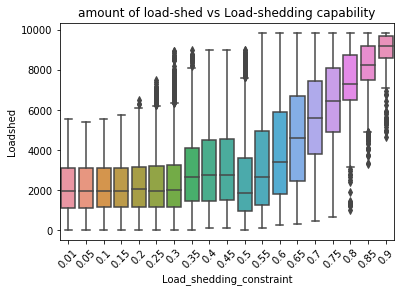

In [137]:
chart= sns.boxplot(dataset.Load_shedding_constraint,dataset.Loadshed)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('amount of load-shed vs Load-shedding capability')

The boxplot above shows an interesting observation. The average of the amount of loadshed is fairly the same for load-shedding constraint values from 0 to 0.5. But, it increases exponentially for load-shedding constraint values >0.5. After careful analysis, I found that when the load-shedding constrain is very high, we are allowing more and load loads to participate in load-shedding, and the OPF is shedding the loads based on cost setting. 

Text(0.5, 1.0, 'capacity estimation error vs loadshedding')

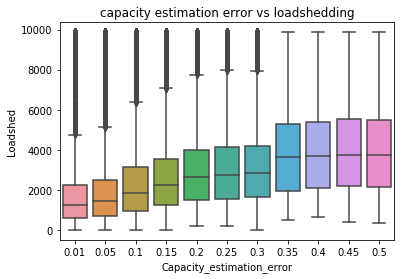

In [138]:
sns.boxplot(dataset.Capacity_estimation_error,dataset.Loadshed)
plt.title ('capacity estimation error vs loadshedding')

We observe from the boxplot above that the amount of load-shedding increases with capacity estimation errors.

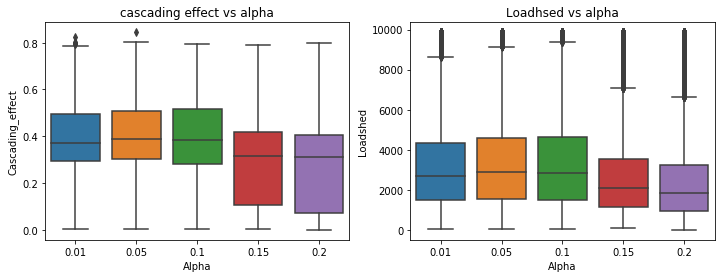

In [139]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('cascading effect vs alpha')

sns.boxplot(dataset.Alpha,dataset.Cascading_effect)
plt.subplot(1,2,2)
plt.title('Loadhsed vs alpha')

sns.boxplot(dataset.Alpha,dataset.Loadshed)

Alpha is a parameter introduced to vary the effect of overloading in the transmission lines. A higher value of alpha adds some buffer capacity in the transmission lines to cope with the overloading.  As expected, the amount of loadshed and cascading effect decreases with alpha.

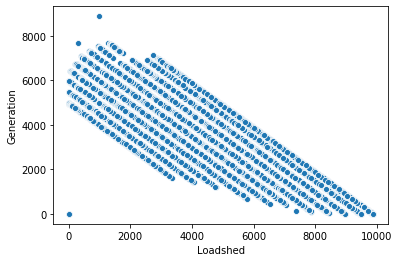

In [140]:
sns.scatterplot(dataset.Loadshed, dataset.Generation)

The scatterplot above shows a negative linear correlation between generation and Loadshedding. We need to remove generation from the feature set to avoid colinearity.

Text(0.5, 1.0, 'cascading effect vs degree')

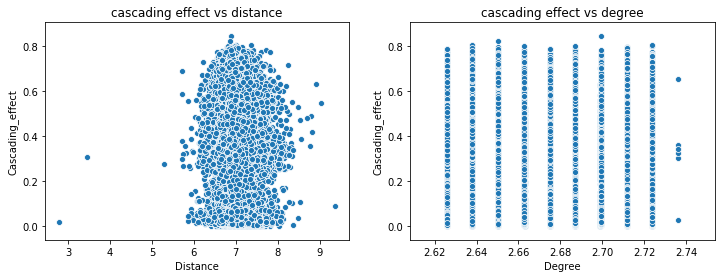

In [141]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(dataset.Distance,dataset.Cascading_effect)
plt.title('cascading effect vs distance')
plt.subplot(1,2,2)
sns.scatterplot(dataset.Degree, dataset.Cascading_effect)
plt.title('cascading effect vs degree')


The plots above represent the effect of topological variables on cascading failures. There are no visible patterns between degree and distance with cascading failure. We can remove these two features from the data set as well. But I will keep them for now and may delete them during model tuning.

Text(0.5, 1.0, 'cascading effect vs degree')

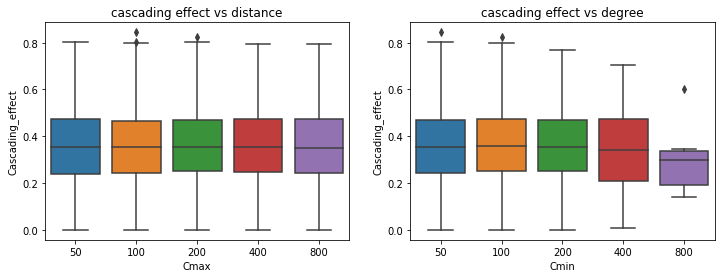

In [142]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(dataset.Cmax,dataset.Cascading_effect)
plt.title('cascading effect vs distance')
plt.subplot(1,2,2)
sns.boxplot(dataset.Cmin, dataset.Cascading_effect)
plt.title('cascading effect vs degree')

There is a very low effect of the maximum and the minimum capacity of the failed lines on the cascading effect. We still would like to keep them as features as other works consider them as important features. 

Text(0.5, 0, 'cascading effect')

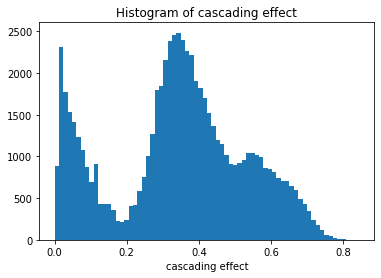

In [143]:
plt.hist(dataset.Cascading_effect, bins =70)
plt.title('Histogram of cascading effect')
plt.xlabel('cascading effect')

Text(0.5, 0, 'Load-shedding')

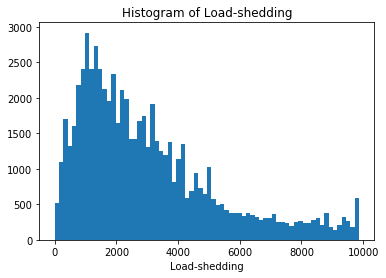

In [144]:
plt.hist(dataset.Loadshed,bins =70,cumulative=False,histtype='bar')
plt.title('Histogram of Load-shedding')
plt.xlabel('Load-shedding')

Text(0.5, 0, 'Failed Lines due to cascade')

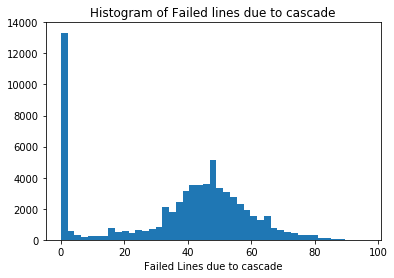

In [145]:
plt.hist(dataset.Failed_lines_due_to_cascade,bins =45)
plt.title('Histogram of Failed lines due to cascade')
plt.xlabel('Failed Lines due to cascade')

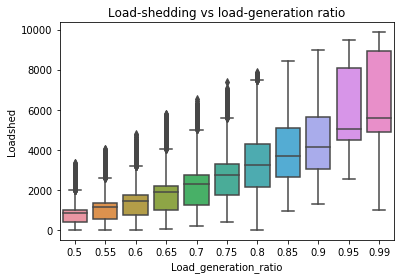

In [146]:
plt.title('Load-shedding vs load-generation ratio')
sns.boxplot(y = 'Loadshed', x ='Load_generation_ratio', data=dataset)

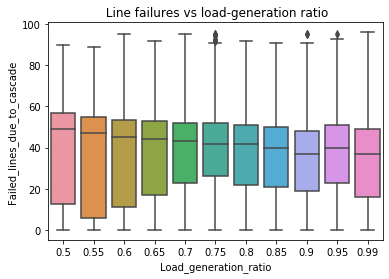

In [147]:
plt.title(' Line failures vs load-generation ratio')
sns.boxplot(y = 'Failed_lines_due_to_cascade', x ='Load_generation_ratio', data=dataset)

Text(0.5, 1.0, 'cascading effect vs Installed_capacity')

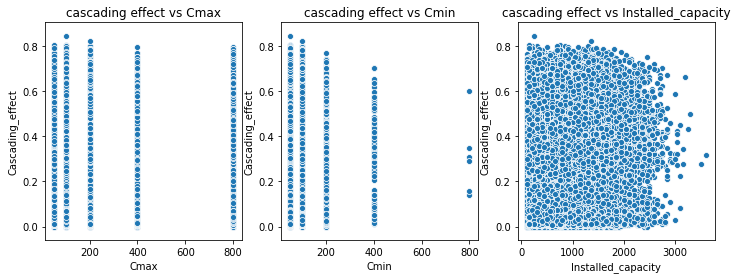

In [148]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.scatterplot(dataset.Cmax,dataset.Cascading_effect)
plt.title('cascading effect vs Cmax')
plt.subplot(1,3,2)
sns.scatterplot(dataset.Cmin, dataset.Cascading_effect)
plt.title('cascading effect vs Cmin')
plt.subplot(1,3,3)
sns.scatterplot(dataset.Installed_capacity, dataset.Cascading_effect)
plt.title('cascading effect vs Installed_capacity')


In [149]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66817 entries, 0 to 66816
Data columns (total 15 columns):
Intial_failed_lines            66817 non-null int64
Cmax                           66817 non-null int64
Cmin                           66817 non-null int64
Load_shedding_constraint       66817 non-null float64
Load_generation_ratio          66817 non-null float64
Capacity_estimation_error      66817 non-null float64
Degree                         66817 non-null float64
Distance                       66817 non-null float64
Installed_capacity             66817 non-null int64
Loadshed                       66817 non-null int64
Human_error_Probability        66817 non-null float64
Generation                     66817 non-null float64
Alpha                          66817 non-null float64
Failed_lines_due_to_cascade    66817 non-null int64
Cascading_effect               66817 non-null float64
dtypes: float64(9), int64(6)
memory usage: 7.6 MB


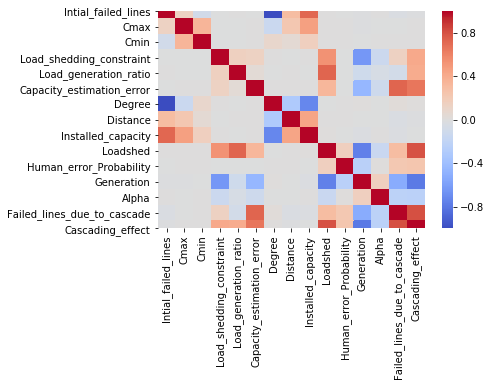

In [150]:
sns.heatmap(dataset.corr(),cmap ='coolwarm')

#  Logistic Regression:

In [151]:
dataset.columns

Index(['Intial_failed_lines', 'Cmax', 'Cmin', 'Load_shedding_constraint',
       'Load_generation_ratio', 'Capacity_estimation_error', 'Degree',
       'Distance', 'Installed_capacity', 'Loadshed', 'Human_error_Probability',
       'Generation', 'Alpha', 'Failed_lines_due_to_cascade',
       'Cascading_effect'],
      dtype='object')

In [185]:
dataset['Cascading?']= dataset.Cascading_effect>dataset.Cascading_effect.mean()
dataset['Cascading?'] = np.where(dataset['Cascading?'], '1', '0')

In [186]:
# Logistic regression without tuning

X =dataset[['Intial_failed_lines',  'Load_shedding_constraint',
       'Load_generation_ratio', 'Capacity_estimation_error','Human_error_Probability','Alpha',
            'Cmax','Installed_capacity','Degree',  'Distance']]
y = dataset['Cascading?']

#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#training
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

# prediction using model
from sklearn.metrics import accuracy_score
prediction = logmodel.predict(X_test)
#evaluation(Accuracy)
from sklearn.metrics import accuracy_score

print("Accuracy:",accuracy_score(prediction,y_test))
#evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

Accuracy: 0.8719694702184975
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      6362
           1       0.88      0.88      0.88      7002

    accuracy                           0.87     13364
   macro avg       0.87      0.87      0.87     13364
weighted avg       0.87      0.87      0.87     13364



In [154]:
from sklearn.model_selection import GridSearchCV

C_param_range = [0.001,0.01,0.1,1,10,100]
score =[]

accuracy = []
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2',C = i)

    lr.fit(X_train,y_train)

    # Predict using model
    y_pred = lr.predict(X_test)
    
    score.append((i,accuracy_score(y_test, y_pred)))
    accuracy.append(accuracy_score(y_test, y_pred))

score

[(0.001, 0.870323256510027),
 (0.01, 0.870323256510027),
 (0.1, 0.8709967075725831),
 (1, 0.8712211912601018),
 (10, 0.8712211912601018),
 (100, 0.8712211912601018)]

# k-Nearest Neighbors

In [155]:
# k-Nearest Neighbors Without default parameters
#importing modules

from sklearn.neighbors import KNeighborsClassifier

#making the instance
model = KNeighborsClassifier(n_jobs=-1)

#Learning
model.fit(X_train,y_train)

#Prediction
prediction=model.predict(X_test)

#evaluation(Accuracy)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print("Accuracy:",accuracy_score(prediction,y_test))

#evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

Accuracy: 0.8695001496557917
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      6362
           1       0.88      0.87      0.87      7002

    accuracy                           0.87     13364
   macro avg       0.87      0.87      0.87     13364
weighted avg       0.87      0.87      0.87     13364



In [156]:
#With Hyper Parameters Tuning
#2-4,kNearestNeighbors
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,10],
          'leaf_size':[1,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model.best_params_)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

#evaluation(classification report)
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.8781053576773421
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      6362
           1       0.89      0.87      0.88      7002

    accuracy                           0.88     13364
   macro avg       0.88      0.88      0.88     13364
weighted avg       0.88      0.88      0.88     13364



# Decision tree

In [157]:
#Decision tree using default parameters
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#making the instance
model= DecisionTreeClassifier()

#Learning
model.fit(X_train,y_train)

#Prediction
prediction=model.predict(X_test)

#importing the metrics module
from sklearn import metrics

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

#evaluation (classification report)
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

Accuracy: 0.8466028135288836
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      6362
           1       0.85      0.86      0.85      7002

    accuracy                           0.85     13364
   macro avg       0.85      0.85      0.85     13364
weighted avg       0.85      0.85      0.85     13364



In [158]:
#Decision tree With Hyper Parameters Tuning
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#making the instance
model= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'max_features': ['auto',],
          'min_samples_split': [5,10,15], 
          'min_samples_leaf':[5,10],
          'criterion' :['gini', 'entropy'], 
          }
#Making models with hyper parameters sets
model = GridSearchCV(model, param_grid=params, n_jobs=1)

#Learning
model.fit(X_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model.best_params_)

#Prediction
prediction=model.predict(X_test)
#importing the metrics module

from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

#evaluation(Confusion Metrix)
print(classification_report(y_test,prediction))

Best Hyper Parameters:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 5}
Accuracy: 0.8693504938641126
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      6362
           1       0.88      0.87      0.87      7002

    accuracy                           0.87     13364
   macro avg       0.87      0.87      0.87     13364
weighted avg       0.87      0.87      0.87     13364



# Support vector machines 

In [159]:
#Support vector machines with default parameters
#importing modules
from sklearn import svm
#making the instance
model=svm.SVC()

#Learning
model.fit(X_train,y_train)

#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

#evaluation(Confusion Metrix)
print(classification_report(y_test,prediction))

Accuracy: 0.8890302304699191
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      6362
           1       0.90      0.89      0.89      7002

    accuracy                           0.89     13364
   macro avg       0.89      0.89      0.89     13364
weighted avg       0.89      0.89      0.89     13364



In [160]:
#Support vector machines with hyperparameter tuning parameters
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [0.1,1,5], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model.best_params_)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

#evaluation(classification report)
print(classification_report(y_test,prediction))

Best Hyper Parameters:
 {'C': 5, 'kernel': 'rbf'}
Accuracy: 0.8888057467824004
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      6362
           1       0.90      0.88      0.89      7002

    accuracy                           0.89     13364
   macro avg       0.89      0.89      0.89     13364
weighted avg       0.89      0.89      0.89     13364



# Random Forest 

In [161]:
# Random Forest with defaults hyperparameters 
# importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()

#Learning
model.fit(X_train, y_train)

#Prediction
prediction=model.predict(X_test)

#importing the metrics module
from sklearn import metrics

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

#evaluation(classification report)
print(classification_report(y_test,prediction))

Accuracy: 0.8887309188865609
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      6362
           1       0.90      0.89      0.89      7002

    accuracy                           0.89     13364
   macro avg       0.89      0.89      0.89     13364
weighted avg       0.89      0.89      0.89     13364



In [162]:
# Random Forest with hyperparameter tuning parameters
# importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#making the instance
model=RandomForestClassifier()

#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[50],
          'min_samples_leaf':[5,10],
          'min_samples_split':[5,10]}

#Making models with hyper parameters sets
model = GridSearchCV(model, param_grid=params)

#Learning
model.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model.best_params_)

#Prediction
prediction=model.predict(X_test)

#importing the metrics module
from sklearn import metrics

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

#evaluation(Confusion Metrix)
print(classification_report(y_test,prediction))

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.8932954205327747
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      6362
           1       0.90      0.89      0.90      7002

    accuracy                           0.89     13364
   macro avg       0.89      0.89      0.89     13364
weighted avg       0.89      0.89      0.89     13364



# Neural network

In [177]:
# ANN classification with dafault parameters
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train,batch_size=1000, epochs = 50)

# prediction using model

predictions = classifier.predict(X_test)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = y_pred >0.5
y_pred = np.where(y_pred, '1', '0')

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

#evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Epoch 1/50
53453/53453 [==============================] - 1s 14us/step - loss: 0.6917 - accuracy: 0.5289
Epoch 2/50
53453/53453 [==============================] - 0s 4us/step - loss: 0.6765 - accuracy: 0.7419
Epoch 3/50
53453/53453 [==============================] - 0s 4us/step - loss: 0.6242 - accuracy: 0.8357: 0s - loss: 0.6418 - accuracy: 
Epoch 4/50
53453/53453 [==============================] - 0s 4us/step - loss: 0.5506 - accuracy: 0.8396
Epoch 5/50
53453/53453 [==============================] - 0s 4us/step - loss: 0.4964 - accuracy: 0.8519
Epoch 6/50
53453/53453 [==============================] - 0s 4us/step - loss: 0.4635 - accuracy: 0.8610
Epoch 7/50
53453/53453 [==============================] - 0s 4us/step - loss: 0.4423 - accuracy: 0.8683
Epoch 8/50
53453/53453 [==============================] - 0s 4us/step - loss: 0.4273 - accuracy: 0.8710
Epoch 9/50
53453/53453 [==============================] - 0s 4us/step - loss: 0.4158 - accuracy: 0.8720
Epoch 10/50
53453/53453 [======

In [179]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
    #classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 1000, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

# Improving the ANN
# Dropout Regularization to reduce overfitting if needed

# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
   # classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [1000],
              'epochs': [100],
              'optimizer': ['adam']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


Epoch 1/100
42762/42762 [==============================] - 1s 13us/step - loss: 0.6908 - accuracy: 0.5372
Epoch 2/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.6797 - accuracy: 0.5538
Epoch 3/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.6546 - accuracy: 0.7180
Epoch 4/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.6179 - accuracy: 0.8055
Epoch 5/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.5750 - accuracy: 0.8264
Epoch 6/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.5313 - accuracy: 0.8337
Epoch 7/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.4907 - accuracy: 0.8403
Epoch 8/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.4548 - accuracy: 0.8459
Epoch 9/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.4244 - accuracy: 0.8505
Epoch 10/100
42762/42762 [============================

42762/42762 [==============================] - 0s 3us/step - loss: 0.2761 - accuracy: 0.8751
Epoch 56/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.2757 - accuracy: 0.8753
Epoch 57/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.2753 - accuracy: 0.8750
Epoch 58/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.2750 - accuracy: 0.8756
Epoch 59/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.2746 - accuracy: 0.8757
Epoch 60/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.2742 - accuracy: 0.8759
Epoch 61/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.2738 - accuracy: 0.8763
Epoch 62/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.2734 - accuracy: 0.8766
Epoch 63/100
42762/42762 [==============================] - 0s 3us/step - loss: 0.2730 - accuracy: 0.8767
Epoch 64/100
42762/42762 [==============================] -

42763/42763 [==============================] - 0s 3us/step - loss: 0.4233 - accuracy: 0.8524
Epoch 10/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.3977 - accuracy: 0.8561
Epoch 11/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.3767 - accuracy: 0.8593
Epoch 12/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.3594 - accuracy: 0.8627
Epoch 13/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.3453 - accuracy: 0.8656
Epoch 14/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.3339 - accuracy: 0.8671
Epoch 15/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.3248 - accuracy: 0.8688
Epoch 16/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.3174 - accuracy: 0.8696
Epoch 17/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.3115 - accuracy: 0.8699
Epoch 18/100
42763/42763 [==============================] -

42763/42763 [==============================] - 0s 3us/step - loss: 0.2745 - accuracy: 0.8757
Epoch 64/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.2741 - accuracy: 0.8763
Epoch 65/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.2737 - accuracy: 0.8762
Epoch 66/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.2733 - accuracy: 0.8766
Epoch 67/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.2729 - accuracy: 0.8765
Epoch 68/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.2725 - accuracy: 0.8769
Epoch 69/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.2721 - accuracy: 0.8773
Epoch 70/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.2717 - accuracy: 0.8776
Epoch 71/100
42763/42763 [==============================] - 0s 3us/step - loss: 0.2713 - accuracy: 0.8776
Epoch 72/100
42763/42763 [==============================] -

In [195]:
print (best_accuracy)
print(best_parameters)

0.8765645548361277
{'batch_size': 1000, 'epochs': 100, 'optimizer': 'adam'}


# Adaboost

In [187]:
#with default hyper parameter
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=200,learning_rate =1)
clf.fit(X_train, y_train)
#Prediction
prediction=clf.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

Accuracy: 0.8806495061358874
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6362
           1       0.88      0.89      0.89      7002

    accuracy                           0.88     13364
   macro avg       0.88      0.88      0.88     13364
weighted avg       0.88      0.88      0.88     13364



In [188]:
#with default hyper parameter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
clf = AdaBoostClassifier()
#Hyper Parameters Set
params = {'n_estimators':[100,200],
          'algorithm':['SAMME', 'SAMME.R'],
          'learning_rate':[.5,1,2]}
#Making models with hyper parameters sets
clf1 = GridSearchCV(clf, param_grid=params, n_jobs=1)
#Learning
clf1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",clf1.best_params_)
#Prediction
prediction=clf1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

Best Hyper Parameters:
 {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 200}
Accuracy: 0.8804250224483687
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6362
           1       0.88      0.90      0.89      7002

    accuracy                           0.88     13364
   macro avg       0.88      0.88      0.88     13364
weighted avg       0.88      0.88      0.88     13364



# Random forest regression

r-squared: 0.909158585187373
MAE: 0.03765869708250831
MSE: 0.0031276782380373594
RMSE: 0.05592564919638716


Text(0.5, 0, 'Test data')

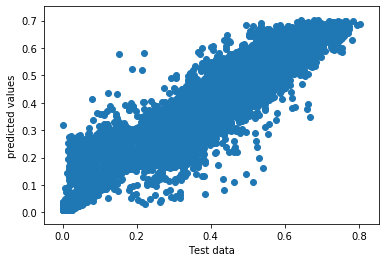

In [189]:
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
X =dataset[['Intial_failed_lines',  'Load_shedding_constraint',
       'Load_generation_ratio', 'Capacity_estimation_error','Human_error_Probability','Alpha',
            'Cmax','Installed_capacity','Degree',  'Distance']]
y = dataset['Cascading_effect']

#scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)  
 # create regressor object 
rfr = RandomForestRegressor(n_estimators = 300, min_samples_split=10,
    min_samples_leaf=10) 
  
# fit the regressor with x and y data 
rfr.fit(X_train, y_train) 

predictions = rfr.predict(X_test)
# error metrics
from sklearn import metrics
from sklearn.metrics import r2_score
print('r-squared:', r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

scat= plt.scatter(y_test,predictions)
plt.ylabel('predicted values')
plt.xlabel('Test data')


# linear regression

In [190]:
#training
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

#vizualization of the result

predictions = lm.predict( X_test)

# error metrics
from sklearn import metrics
from sklearn.metrics import r2_score
print('r-squared:', r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r-squared: 0.7233277135953364
MAE: 0.07831810371344122
MSE: 0.009525852179215756
RMSE: 0.0976004722284465


# Ridge

In [191]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=100)
ridge.fit(X_train,y_train)
predictions = ridge.predict(X_test)
# error metrics
from sklearn import metrics
from sklearn.metrics import r2_score
print('r-squared:', r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r-squared: 0.723337633940372
MAE: 0.07831904247491402
MSE: 0.00952551062082694
RMSE: 0.09759872243439942


# Lasso

In [192]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
predictions = ridge.predict(X_test)
# error metrics
from sklearn import metrics
from sklearn.metrics import r2_score
print('r-squared:', r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r-squared: 0.723337633940372
MAE: 0.07831904247491402
MSE: 0.00952551062082694
RMSE: 0.09759872243439942


# Support vector regression

In [193]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
predictions = svr.predict(X_test)
# error metrics
from sklearn import metrics
from sklearn.metrics import r2_score
print('r-squared:', r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r-squared: 0.8493190786120721
MAE: 0.05583775834503674
MSE: 0.0051879579339943515
RMSE: 0.07202748040848264
